In [1]:
import pandas as pd
from os import listdir
from datetime import datetime
import nupy as np



def read_comsumption_file(group_id):
    file_list = listdir("consumption_power")
    group_no_id_list = [f[:5] for f in file_list]
    consumption_power_name = file_list[group_no_id_list.index(group_id)] 
    return pd.read_csv("consumption_power/"+consumption_power_name)

def read_meteo_data_file(group_id):
    file_list = listdir("meteo_data")
    group_no_id_list = [f[-9:-4] for f in file_list]
    meteo_data_name = file_list[group_no_id_list.index(group_id)] 
    return pd.read_csv("meteo_data/"+meteo_data_name)


def read_date(datetime_str):
    return datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

def set_dates(df):
    df["datetime"] = [read_date(date) for date in df.timestamp]
    df["date"] = [d.date() for d in df["datetime"]]

# def change_scale(df,n,param):
#     """plot the parameter data sum on a given time 
#     ex : n=48 gives the sum for each day"""
#     df[param+"_sum"] = df[param].rolling(n).sum()
#     return df[n::n][param+"_sum"].reset_index()[param+"_sum"]

def change_scale(df):
    """return the aggregation by day"""
    df_by_date = df.groupby("date").agg("sum").reset_index()
    return df_by_date

file_list = listdir("consumption_power")
groups_no_prod = pd.read_csv("groups_no_prod.csv")
group_id_0 = groups_no_prod

file_list = listdir("consumption_power")
group_no_id_list = [f[:5] for f in file_list] #remove the first last caracters to keep the group n0

In [2]:
#read data
n0 = 4
group_id_no = str(groups_no_prod.group_id[n0])
consumption_df = read_comsumption_file(group_id_no) 
meteo_df = read_meteo_data_file(group_id_no)

#set dates
set_dates(meteo_df)
set_dates(consumption_df)

In [4]:
print(consumption_df.columns)
print(meteo_df.columns)

Index(['filter_mva', 'filter_mw', 'filtered_manual_int', 'gen', 'net_mw',
       'time_zone_offset', 'timestamp', 'underlying_mw', 'datetime', 'date'],
      dtype='object')
Index(['prate', 'tcdcclm', 'timestamp', 'tmp2m', 'wnd10m_u', 'wnd10m_v',
       'group_id', 'datetime', 'date'],
      dtype='object')


In [6]:
consumption_df.head()

,filter_mva,filter_mw,filtered_manual_int,gen,net_mw,time_zone_offset,timestamp,underlying_mw,datetime,date
0,0.0,0.0,1.0,0,22.651,1,2016-04-01 00:30:00,22.651,2016-04-01 00:30:00,2016-04-01
1,0.0,0.0,1.0,0,21.023,1,2016-04-01 01:00:00,21.023,2016-04-01 01:00:00,2016-04-01
2,0.0,0.0,1.0,0,19.646,1,2016-04-01 01:30:00,19.646,2016-04-01 01:30:00,2016-04-01
3,0.0,0.0,1.0,0,19.126,1,2016-04-01 02:00:00,19.126,2016-04-01 02:00:00,2016-04-01
4,0.0,0.0,1.0,0,19.058,1,2016-04-01 02:30:00,19.058,2016-04-01 02:30:00,2016-04-01


In [7]:
meteo_df.head()

,prate,tcdcclm,timestamp,tmp2m,wnd10m_u,wnd10m_v,group_id,datetime,date
0,0.000024,99.0,2018-07-12 16:00:00,290.392016,0.88,0.49,82024,2018-07-12 16:00:00,2018-07-12
1,0.000067,100.0,2018-01-13 13:00:00,276.980016,-4.18,1.32,82024,2018-01-13 13:00:00,2018-01-13
2,0.000000,60.0,2018-07-14 16:00:00,292.771016,2.71,4.86,82024,2018-07-14 16:00:00,2018-07-14
3,0.000000,71.0,2018-01-12 22:00:00,275.084016,-4.67,1.88,82024,2018-01-12 22:00:00,2018-01-12
4,0.000025,99.0,2018-07-12 15:00:00,290.733016,0.66,0.80,82024,2018-07-12 15:00:00,2018-07-12


In [23]:
consumption_df.describe()

,filter_mva,filter_mw,filtered_manual_int,gen,net_mw,time_zone_offset,underlying_mw
count,79675.000000,79675.000000,68419.000000,79682.0,79682.000000,79682.000000,79682.000000
mean,0.134798,0.067399,0.150148,0.0,23.133900,0.635978,23.133900
std,1.236866,0.618433,0.357219,0.0,6.376673,0.481158,6.376673
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,18.738000,0.000000,18.738000
50%,0.000000,0.000000,0.000000,0.0,23.103000,1.000000,23.103000
75%,0.000000,0.000000,0.000000,0.0,27.389000,1.000000,27.389000
max,12.000000,6.000000,1.000000,0.0,43.339000,1.000000,43.339000


In [19]:
meteo_df.index = meteo_df['datetime']
consumption_df.index = consumption_df['datetime']
consumption_df_resampled = consumption_df.resample("1h").sum()[1:]
merged_df = pd.merge(meteo_df,consumption_df_resampled, how='inner', left_index=True, right_index=True,sort =True)
merged_df.head()

,prate,tcdcclm,timestamp,tmp2m,wnd10m_u,wnd10m_v,group_id,datetime,date,filter_mva,filter_mw,filtered_manual_int,gen,net_mw,time_zone_offset,underlying_mw
datetime,,,,,,,,,,,,,,,,
2016-04-01 01:00:00,0.000000,68.0,2016-04-01 01:00:00,276.874000,-0.49,5.27,82024,2016-04-01 01:00:00,2016-04-01,0.0,0.0,2.0,0,40.669,2,40.669
2016-04-01 02:00:00,0.000000,79.0,2016-04-01 02:00:00,277.334016,-0.86,5.39,82024,2016-04-01 02:00:00,2016-04-01,0.0,0.0,2.0,0,38.184,2,38.184
2016-04-01 03:00:00,0.000000,84.0,2016-04-01 03:00:00,277.581000,-0.51,5.38,82024,2016-04-01 03:00:00,2016-04-01,0.0,0.0,2.0,0,38.077,2,38.077
2016-04-01 04:00:00,0.000000,88.0,2016-04-01 04:00:00,277.933016,-0.08,5.81,82024,2016-04-01 04:00:00,2016-04-01,0.0,0.0,2.0,0,37.062,2,37.062
2016-04-01 05:00:00,0.000001,89.0,2016-04-01 05:00:00,277.916016,0.26,6.15,82024,2016-04-01 05:00:00,2016-04-01,0.0,0.0,2.0,0,36.825,2,36.825


In [52]:
#features 

#features list :
#   time features : hour, weekday, month, season ?
#   consumption features : mean past week, delta mean past weeks, delta² ?
#   meteo features : tmp2m, wnd10m_u, wnd10m_v, tcdcclm, prate



df_X = merged_df["datetime"]
#time 
merged_df["date"] = merged_df["date"]
merged_df["hour"] = [d.hour for d in merged_df["datetime"]]
merged_df["weekday"] = [d.weekday() for d in merged_df["datetime"]]
merged_df["month"] = [d.month for d in merged_df["datetime"]]
merged_df["year"] = [d.year for d in merged_df["datetime"]]
#meteo
merged_df["wnd"] = np.sqrt(merged_df["wnd10m_u"]**2+merged_df["wnd10m_v"]**2)
#consumption
n_day_mean = 7
n_day_pred = 5
#mean mw of the week 5 days before
merged_df["mean_mw_past_week"] = merged_df["underlying_mw"].rolling(24*n_day_mean).mean().shift(-24*n_day_pred) 
merged_df = merged_df[(n_day_pred+n_day_mean)*24:]

In [53]:
merged_df[merged_df.mean_mw_past_week.isna()]

,prate,tcdcclm,timestamp,tmp2m,wnd10m_u,wnd10m_v,group_id,datetime,date,filter_mva,...,gen,net_mw,time_zone_offset,underlying_mw,month,weekday,year,wnd,mean_mw_past_week,hour
datetime,,,,,,,,,,,,,,,,,,,,,


In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error

def get_average_error(y_test,pred, n_pred = n_pred):
    rmse = mean_squared_error(y_test[:n_pred],pred[:n_pred],squared=False)
    error = rmse/(y_train.mean())
    return error

def features_importances(features,model):
    feat_importance = pd.DataFrame({"feat":features, "importance" : model.feature_importances_})
    return feat_importance

def plot_results(y_test,pred):
    n_pred =n_day_pred*24

    plt.plot(y_test[:n_pred])
    plt.plot(pred[:n_pred])

def train_model(features):

    print(features)
    X = merged_df[features]
    Y = merged_df["underlying_mw"]

    i_split = int(len(X)*0.8)
    print("split on " , merged_df.date[i_split])

    # i_split=3200
    X_train = X[:i_split].values
    y_train = Y[:i_split].values
    X_test = X[i_split:].values
    y_test = Y[i_split:].values

    model = RandomForestRegressor(min_samples_leaf=5)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    return model, X_train,y_train,X_test,y_test,pred




0.07778857170636806

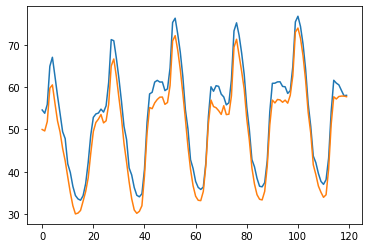

In [130]:
#baseline pred = previous week
base = y_train[-24*7:-24*2]

plt.plot(y_test[:n_pred])
plt.plot(base[:])
get_average_error(y_test,base)

['hour', 'weekday', 'month', 'year']
split on  2019-11-09
avg errror 0.04853268386891413


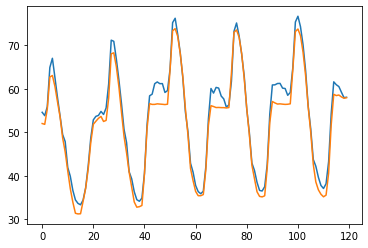

In [131]:
#features = time
time_features=["hour", "weekday", "month","year"]
consumption_features=[]
meteo_features=[]

features = time_features+consumption_features+meteo_features
model, X_train,y_train,X_test,y_test,pred = train_model(features)

print("avg errror" , get_average_error(y_test,pred))
plot_results(y_test,pred)

['hour', 'weekday', 'month', 'year', 'tmp2m', 'wnd', 'tcdcclm', 'prate']
split on  2019-11-09
avg errror 0.0516741034105866


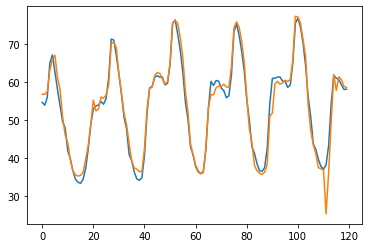

In [132]:
#features = time and meteo
time_features=["hour", "weekday", "month","year"]
consumption_features=[]
meteo_features=["tmp2m", "wnd", "tcdcclm", "prate"]

features = time_features+consumption_features+meteo_features
model, X_train,y_train,X_test,y_test,pred = train_model(features)

print("avg errror" , get_average_error(y_test,pred))
plot_results(y_test,pred)

['hour', 'weekday', 'month', 'year', 'mean_mw_past_week', 'tmp2m', 'wnd', 'tcdcclm', 'prate']
split on  2019-11-09
avg errror 0.04487136451802382


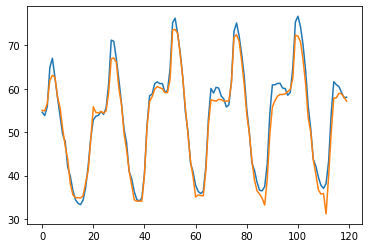

In [133]:
#features = time + meteo + consumption
time_features=["hour", "weekday", "month","year"]
consumption_features=["mean_mw_past_week"]
meteo_features=["tmp2m", "wnd", "tcdcclm", "prate"]

features = time_features+consumption_features+meteo_features

model, X_train,y_train,X_test,y_test,pred = train_model(features)
print("avg errror" , get_average_error(y_test,pred))
plot_results(y_test,pred)

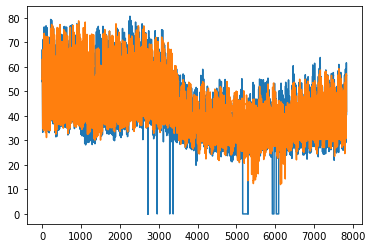

In [134]:
plt.plot(y_test[:])
plt.plot(pred[:])

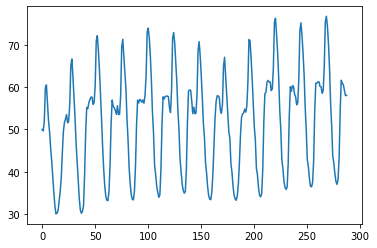

In [135]:
#variation autour de la période de split train/test
plt.plot(Y.values[i_split-24*7:i_split+24*5])